<table>
    <tr>
        <
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> NOTEBOOK  </p> EDA+KNN </FONT>         </h1></td>         
        <td>
        </td>
    </tr>
</table>

# <FONT SIZE=5 COLOR="green"> **Data Exploratory analysis** </FONT>




#Solucion 1.1

In [ ]:
# Manipulación de data.frames
import pandas as pd
import numpy as np

# Librerías para Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use("ggplot")
# para ajustar el tamaño de las gráficas en todo el notebook.
plt.rcParams["figure.figsize"] = (10,5)

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento
from sklearn.preprocessing      import StandardScaler, MinMaxScaler

# Para aplicar k-nearest neiborg
from sklearn.neighbors          import KNeighborsClassifier

# Métricas de evaluación
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV, RandomizedSearchCV

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/homicidios-ven-col.xlsx"

In [ ]:
homicidios= pd.read_excel(url)
homicidios.head()

,Ano,Fecha,Departamento,Municipio,Día,Hora,Barrio,Zona,Clase de sitio,Arma empleada,...,Móvil Victima,Edad,Sexo,Estado civil,País de nacimiento,Clase de empleado,Profesión,Escolaridad,Código DANE,Cantidad
0,2019,2019-01-01,ANTIOQUIA,ARGELIA,Martes,03:00:00,SAN PABLO,RURAL,FINCAS Y SIMILARES,ARMA BLANCA / CORTOPUNZANTE,...,A PIE,37,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,-,ANALFABETA,5055000,1
1,2019,2019-01-01,ANTIOQUIA,BELLO,Martes,04:49:00,PLAYA RICA,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,...,A PIE,24,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,-,SECUNDARIA,5088000,1
2,2019,2019-01-01,ANTIOQUIA,BELLO,Martes,18:43:00,LA MILAGROSA,URBANA,CASAS DE HABITACION,ARMA BLANCA / CORTOPUNZANTE,...,A PIE,62,FEMENINO,SEPARADO,COLOMBIA,AMA DE CASA,ADMINISTRACION DE EMPRESAS,SUPERIOR,5088000,1
3,2019,2019-01-01,ANTIOQUIA,BRICEÑO,Martes,21:40:00,SECTOR CEMENTERIO,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,...,A PIE,34,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO EJERCITO,-,SECUNDARIA,5107000,1
4,2019,2019-01-01,ANTIOQUIA,CONCORDIA,Martes,22:05:00,PEÑITAS,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,...,A PIE,33,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,-,SECUNDARIA,5209000,1


In [ ]:
homicidios.tail()

,Ano,Fecha,Departamento,Municipio,Día,Hora,Barrio,Zona,Clase de sitio,Arma empleada,...,Móvil Victima,Edad,Sexo,Estado civil,País de nacimiento,Clase de empleado,Profesión,Escolaridad,Código DANE,Cantidad
49353,2016,2016-12-31,VALLE,CARTAGO,Sábado,10:00:00,PRIMAVERA,RURAL,FINCAS Y SIMILARES,ARMA DE FUEGO,...,A PIE,32,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,-,PRIMARIA,76147000,1
49354,2016,2016-12-31,VALLE,PALMIRA,Sábado,17:20:00,LA EMILIA,URBANA,DENTRO DE LA VIVIENDA,ARMA DE FUEGO,...,A PIE,67,MASCULINO,CASADO,COLOMBIA,PENSIONADO,-,SECUNDARIA,76520000,1
49355,2016,2016-12-31,VALLE,PALMIRA,Sábado,01:16:00,CORREGIMIENTO AMAIME,RURAL,VIAS PUBLICAS,ARMA DE FUEGO,...,A PIE,23,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,-,SECUNDARIA,76520000,1
49356,2016,2016-12-31,VALLE,TORO,Sábado,03:40:00,EL REMANSO,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,...,A PIE,22,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,-,SECUNDARIA,76823000,1
49357,2016,2016-12-31,VALLE,TRUJILLO,Sábado,23:30:00,CTO. DOS QUEBARDAS,RURAL,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,...,A PIE,59,MASCULINO,UNION LIBRE,COLOMBIA,EMPLEADO PARTICULAR,-,PRIMARIA,76828000,1


In [ ]:
homicidios.shape

(49358, 21)

In [ ]:
homicidios.columns

Index(['Ano', 'Fecha', 'Departamento', 'Municipio', 'Día', 'Hora', 'Barrio',
       'Zona', 'Clase de sitio', 'Arma empleada', 'Móvil Agresor',
       'Móvil Victima', 'Edad', 'Sexo', 'Estado civil', 'País de nacimiento',
       'Clase de empleado', 'Profesión', 'Escolaridad', 'Código DANE',
       'Cantidad'],
      dtype='object')

In [ ]:
homicidios.dtypes

Ano                            int64
Fecha                 datetime64[ns]
Departamento                  object
Municipio                     object
Día                           object
Hora                          object
Barrio                        object
Zona                          object
Clase de sitio                object
Arma empleada                 object
Móvil Agresor                 object
Móvil Victima                 object
Edad                          object
Sexo                          object
Estado civil                  object
País de nacimiento            object
Clase de empleado             object
Profesión                     object
Escolaridad                   object
Código DANE                    int64
Cantidad                       int64
dtype: object

In [ ]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49358 entries, 0 to 49357
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ano                 49358 non-null  int64         
 1   Fecha               49358 non-null  datetime64[ns]
 2   Departamento        49358 non-null  object        
 3   Municipio           49358 non-null  object        
 4   Día                 49358 non-null  object        
 5   Hora                49358 non-null  object        
 6   Barrio              49358 non-null  object        
 7   Zona                49358 non-null  object        
 8   Clase de sitio      49358 non-null  object        
 9   Arma empleada       49358 non-null  object        
 10  Móvil Agresor       49358 non-null  object        
 11  Móvil Victima       49358 non-null  object        
 12  Edad                49358 non-null  object        
 13  Sexo                49358 non-null  object    

In [ ]:
homicidios_na= homicidios.isna().sum()
homicidios_na

Ano                    0
Fecha                  0
Departamento           0
Municipio              0
Día                    0
Hora                   0
Barrio                 0
Zona                   0
Clase de sitio         0
Arma empleada          0
Móvil Agresor          0
Móvil Victima          0
Edad                  44
Sexo                   0
Estado civil           0
País de nacimiento     0
Clase de empleado      0
Profesión              0
Escolaridad            0
Código DANE            0
Cantidad               0
dtype: int64

In [ ]:
homicidios.drop(homicidios[(homicidios['Edad'].isna() ==True)].index, inplace=True)
homicidios_na= homicidios.isna().sum()
homicidios_na

Ano                   0
Fecha                 0
Departamento          0
Municipio             0
Día                   0
Hora                  0
Barrio                0
Zona                  0
Clase de sitio        0
Arma empleada         0
Móvil Agresor         0
Móvil Victima         0
Edad                  0
Sexo                  0
Estado civil          0
País de nacimiento    0
Clase de empleado     0
Profesión             0
Escolaridad           0
Código DANE           0
Cantidad              0
dtype: int64

In [ ]:
homicidios.describe()

,Ano,Edad,Código DANE,Cantidad
count,49314.000000,49314.000000,4.931400e+04,49314.000000
mean,2017.517277,32.585757,3.826889e+07,1.002190
std,1.117839,12.986171,2.876657e+07,0.055476
min,2016.000000,0.000000,5.001000e+06,1.000000
25%,2017.000000,23.000000,1.100100e+07,1.000000
50%,2018.000000,30.000000,2.575400e+07,1.000000
75%,2019.000000,39.000000,7.022100e+07,1.000000
max,2019.000000,100.000000,9.977300e+07,7.000000


#Visualización de datos

In [ ]:

homicidios.loc[homicidios['Estado civil'] == "-", 'Estado civil'] = "No_Define"
print(homicidios["Estado civil"].value_counts())
fig = px.histogram(homicidios["Estado civil"],                  # variable
                   nbins = 7,                              # número de intervalos
                   x = "Estado civil",                     # nombre de la variable x
                   title = "Criminalidad segun Estado Civil"         # título del gráfico
                                      )

fig.update_traces(marker_color = 'cyan',                    # color de relleno
                  marker_line_color = 'red',                # color del borde
                  marker_line_width = 1,                    # grueso de la línea
                  opacity = 1)                              # transparencia del color

fig.show()


SOLTERO        30420
UNION LIBRE    15529
CASADO          2447
SEPARADO         377
No_Define        230
VIUDO            171
DIVORCIADO       140
Name: Estado civil, dtype: int64


In [ ]:
labels=["SOLTERO","UNION LIBRE","CASADO","SEPARADO","No_Define","VIUDO","DIVORCIADO"]
fig=px.pie(homicidios["Estado civil"].value_counts(),
           names=labels,
           values=homicidios["Estado civil"].value_counts() ,
        )
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

#Busqueda de información relevante:

In [ ]:
homicidios["Edad"] = pd.to_numeric(homicidios["Edad"], errors="coerce")

In [ ]:
freq=homicidios["Edad"].value_counts()
graf= pd.Series.to_frame(freq)
graf

,Edad
25.0,2064
22.0,1977
23.0,1893
20.0,1831
27.0,1808
...,...
93.0,2
100.0,1
98.0,1
92.0,1


In [ ]:
fig = px.histogram(homicidios.Edad,                  # variable
                   nbins = 30,                              # número de intervalos
                   x = "Edad",                     # nombre de la variable x
                   title = "Homicidios por edad"         # título del gráfico
                                      )

fig.update_traces(marker_color = 'cyan',                    # color de relleno
                  marker_line_color = 'red',                # color del borde
                  marker_line_width = 1,                    # grueso de la línea
                  opacity = 1)                              # transparencia del color

fig.show()

In [ ]:
fig = px.histogram(homicidios.Edad,                  # variable
                   nbins = 97,                              # número de intervalos
                   x = "Edad",                     # nombre de la variable x
                   title = "Histograma por edad"         # título del gráfico
                                      )

fig.update_traces(marker_color = 'cyan',                    # color de relleno
                  marker_line_color = 'red',                # color del borde
                  marker_line_width = 1,                    # grueso de la línea
                  opacity = 1)                              # transparencia del color

fig.show()

In [ ]:
px.box(homicidios.Edad,
       color = homicidios["Estado civil"])


Se puede ver que para las variables los estados SOLTERO y UNION libre de la variable Estado civil, se tienen muchos datos outliers, denotando gran variabilidad en esta muestra.

In [ ]:
pd.crosstab(homicidios["Arma empleada"],homicidios["Estado civil"])

Estado civil,CASADO,DIVORCIADO,No_Define,SEPARADO,SOLTERO,UNION LIBRE,VIUDO
Arma empleada,,,,,,,
ACIDO,0,0,0,0,2,0,0
ALMOHADA,2,0,0,1,15,2,0
ARMA BLANCA / CORTOPUNZANTE,427,32,64,120,7206,3223,48
ARMA DE FUEGO,1853,93,128,216,21521,11599,75
ARTEFACTO EXPLOSIVO/CARGA DINAMITA,16,0,0,1,91,15,0
ARTEFACTO INCENDIARIO,0,0,0,0,5,2,0
BOLSA PLASTICA,2,0,2,1,45,13,1
CINTAS/CINTURON,2,0,2,0,30,7,0
COMBUSTIBLE,1,0,1,0,17,7,0


#Solucion 1.9

In [ ]:
px.box(homicidios.Edad,
       color = homicidios["Estado civil"])

KeyError: 'Departamento'

¿Cuál es el top 5 por año de los departamentos con más homicidios?


¿Cuántas personas de sexo femenino, solteras fueron asesinadas con arma de fuego?

¿Cuántas personas de sexo masculino mayores de 20 años, fueron asesinadas en vias públicas?

¿En el año 2018, cuántas personas fueron ultimadas por agresores en motocicleta?

¿Cuántas personas asesinadas por arma cortopunsante, eran solteras y desempleadas?

¿Cuál es el Departamento que registra mayor número de asesinatos? discrimine por sexo.

¿Cuántas personas en Barranquilla fueron asesinadas un día domingo, entre las 6:00 a.m. y 6:00 p.m en zonas urbanas?

#Solucion 1.10

# <FONT SIZE=5 COLOR="green"> **Punto 2. Análisis de una Variable** </FONT>

1. Importe el conjunto de datos **ACTIVIDAD**. La información de este conjunto de datos se puede explorar en

https://www.geriatic.udc.es/el-proyecto/datos-abiertos-open-data-del-proyecto-geria-tic/

```python
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/ACTIVIDAD.csv"
```

el objetivo de este punto es analizar la variable *step* (pasos).

2. Explore los datos rápidamente. ¿Hay datos faltantes?

3. Analice la variable *step*. Utilice histograma y boxplot para hacer el análisis.

4. De la variable *step* identifique los datos atípicos.

5. Hay un *userID* que es atípico a los demás. ¿Lo puede identificar? Realice el boxplot de la variable *step* por cada *userID* sin tener en cuenta a este usuario. Explique.

6. Utilizando *.groupby...* calcule las estadísticas generales: media, desviación estándar, máximo, mínimo, cuartiles para la variable *step* en cada usuario *userID*.

Para los siguientes puntos trabajaremos con el usuario ***10036***

7. Identifique los datos atípicos de la variable *step* del usuario *10036* y

  a) Elimínelos

  b) Reemplácelos por la media de la variable *step* para este usuario

  c) Reemplácelos por la mediana de la variable *step* para este usuario

  d. Calcule los estadísticos descriptivos asociados a los datos en a), b) y  c) y la variable original. Compare los resultados. ¿Cuáles valores se ven más afectados? Concluya.



#Solucion 2.1

In [ ]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/ACTIVIDAD.csv"
actividad= pd.read_csv(url)
actividad.head()


,userId,registerStartDate,registerFinalDate,steps,distance,runDistance,calories,deepSleepTime,shallowSleepTime,wakeTime,sleepStartDate,sleepStopDate
0,10036,2017/10/09 00:00:00,2017/10/10 00:00:00,1625,1113,36,43,0,0,0,2017/10/08 22:00:00,2017/10/08 22:00:00
1,10036,2017/10/10 00:00:00,2017/10/11 00:00:00,1722,1171,0,45,0,0,0,2017/10/09 22:00:00,2017/10/09 22:00:00
2,10036,2017/10/11 00:00:00,2017/10/12 00:00:00,203,123,0,8,0,0,0,2017/10/10 22:00:00,2017/10/10 22:00:00
3,10036,2017/10/12 00:00:00,2017/10/13 00:00:00,213,129,0,10,0,0,0,2017/10/11 22:00:00,2017/10/11 22:00:00
4,10036,2017/10/13 00:00:00,2017/10/14 00:00:00,461,282,16,16,0,0,0,2017/10/12 22:00:00,2017/10/12 22:00:00


#Solucion 2.2

In [ ]:
actividad.info()
actividad.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   userId             4622 non-null   int64 
 1   registerStartDate  4622 non-null   object
 2   registerFinalDate  4622 non-null   object
 3   steps              4622 non-null   int64 
 4   distance           4622 non-null   int64 
 5   runDistance        4622 non-null   int64 
 6   calories           4622 non-null   int64 
 7   deepSleepTime      4622 non-null   int64 
 8   shallowSleepTime   4622 non-null   int64 
 9   wakeTime           4622 non-null   int64 
 10  sleepStartDate     4622 non-null   object
 11  sleepStopDate      4622 non-null   object
dtypes: int64(8), object(4)
memory usage: 433.4+ KB


(4622, 12)

In [ ]:
actividad_na= actividad.isna().sum()
actividad_na

userId               0
registerStartDate    0
registerFinalDate    0
steps                0
distance             0
runDistance          0
calories             0
deepSleepTime        0
shallowSleepTime     0
wakeTime             0
sleepStartDate       0
sleepStopDate        0
dtype: int64

In [ ]:
actividad.describe()

,userId,steps,distance,runDistance,calories,deepSleepTime,shallowSleepTime,wakeTime
count,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000
mean,10049.624405,1687.339247,1077.322588,112.078537,46.683470,95.614885,200.786672,19.061445
std,9.115218,3039.969514,2048.403385,124.710928,128.722794,92.961167,150.131167,30.529457
min,10036.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10041.000000,353.000000,212.000000,41.000000,8.000000,0.000000,66.000000,0.000000
50%,10048.000000,878.500000,520.500000,86.000000,17.000000,69.500000,200.500000,0.000000
75%,10058.000000,1947.500000,1161.750000,139.000000,34.000000,166.000000,328.000000,29.000000
max,10062.000000,33218.000000,22696.000000,2078.000000,1358.000000,409.000000,602.000000,217.000000


#Solucion 2.3

In [ ]:
fig = px.histogram(actividad.steps,                  # variable
                   nbins = 70,                       # número de intervalos
                   x = "steps",                     # nombre de la variable x
                   title = "Histograma Numero de Pasos"         # título del gráfico
                                      )

fig.update_traces(marker_color = 'cyan',                    # color de relleno
                  marker_line_color = 'red',                # color del borde
                  marker_line_width = 1,                    # grueso de la línea
                  opacity = 1)                              # transparencia del color

fig.show()

In [ ]:
px.box(actividad.steps)

#Solucion 2.4

In [ ]:
px.box(actividad.steps,
       color=actividad.userId)

Podemos notar que los valores outliers pertenecen en un gran porcentaje al usuario 10041, procederemos a excluirlo a partir de ahora.


#Solucion 2.5

In [ ]:
actividad.drop(actividad[(actividad['userId'] ==10041)].index, inplace=True)
actividad
px.box(actividad.steps,
       color=actividad.userId)

#Solucion 2.6

In [ ]:
media=actividad.groupby(['userId']).mean()["steps"].to_frame()
std=actividad.groupby(['userId']).std()["steps"].to_frame()
max=actividad.groupby(['userId']).max()["steps"].to_frame()
min=actividad.groupby(['userId']).min()["steps"].to_frame()

qts25=actividad.groupby(['userId']).quantile(.25)["steps"].to_frame()
qts50=actividad.groupby(['userId']).quantile()["steps"].to_frame()
qts75=actividad.groupby(['userId']).quantile(.75)["steps"].to_frame()


d1=media.join(std,lsuffix='_media', rsuffix='_std')
d1["max"]=max
d1["min"]=min
d1["q25"]=qts25
d1["q50"]=qts50
d1["q75"]=qts75
d1








,steps_media,steps_std,max,min,q25,q50,q75
userId,,,,,,,
10036,444.148867,447.728013,3876,0,229.00,354.0,487.00
10037,4256.504950,1379.176640,7384,0,3529.50,4345.0,5234.50
10038,381.168142,677.501567,2849,0,0.00,0.0,833.00
10039,2623.803922,992.251895,5842,0,2057.00,2646.5,3187.50
10043,103.441176,77.026334,406,0,49.25,92.0,143.25
10044,1433.115672,1089.221537,4551,0,553.00,1141.5,2169.25
10045,492.039088,230.052335,2335,30,363.50,450.0,567.50
10047,198.200000,269.007662,1640,0,0.00,155.5,241.00
10048,1775.833876,608.338787,3234,0,1469.50,1783.0,2155.00


# Solucion Punto 2.7

In [ ]:
user10036=actividad.drop(actividad[(actividad['userId'] !=10036)].index, inplace=False)
user10036.head()
ol=0
ol=487-1.5*(487-229)
ol
#a) Elimínelos

a= user10036.drop(user10036[(user10036['steps'] >= ol)].index, inplace=False)

#b) Reemplácelos por la media de la variable step para este usuario
user10036b=user10036
user10036b.loc[user10036['steps'] >= ol, 'steps'] = 444.148867
b=user10036b

#c) Reemplácelos por la mediana de la variable step para este usuario
user10036c=user10036
user10036c.loc[user10036['steps'] >= ol, 'steps'] = 354.148867
c=user10036c
#d. Calcule los estadísticos descriptivos asociados a los datos en a), b) y c) y la variable original. Compare los resultados.
# ¿Cuáles valores se ven más afectados? Concluya



media=a.groupby(['userId']).mean()["steps"].to_frame()
std=a.groupby(['userId']).std()["steps"].to_frame()
qts50=a.groupby(['userId']).quantile()["steps"].to_frame()

a1=media.join(std,lsuffix='_media', rsuffix='_std')
a1["mediana"]=qts50

media=b.groupby(['userId']).mean()["steps"].to_frame()
std=b.groupby(['userId']).std()["steps"].to_frame()
qts50=b.groupby(['userId']).quantile()["steps"].to_frame()

b1=media.join(std,lsuffix='_media', rsuffix='_std')
b1["mediana"]=qts50

media=c.groupby(['userId']).mean()["steps"].to_frame()
std=c.groupby(['userId']).std()["steps"].to_frame()
qts50=c.groupby(['userId']).quantile()["steps"].to_frame()

c1=media.join(std,lsuffix='_media', rsuffix='_std')
c1["mediana"]=qts50


print(a1)
print(b1)
print(c1)


        steps_media  steps_std  mediana
userId                                 
10036     58.555556  28.636127     59.0
        steps_media  steps_std     mediana
userId                                    
10036    345.539353  50.001125  354.148867
        steps_media  steps_std     mediana
userId                                    
10036    345.539353  50.001125  354.148867


Las mayores afectaciones se dan debido a la eliminacion de datos en el dataset, mientras que con los otros valores no vemos grandes variaciones en los estadisticos.

# <FONT COLOR="green"> **. Clasificación con KNN** </FONT>

***Objetivo***. Aplicar el modelo de clasificación ***KNN*** para determinar cuando se aprueba a un cliente una tarjeta de crédito o no, dependiendo de las otras variables.


***Contexto de los datos***

Este Proyecto se basa en un conjunto de datos que se publicó originalmente junto con la quinta edición del libro *Análisis Econométrico* de William Greene.

Este libro tiene datos de tarjetas de crédito que se componen de una variable objetivo que es de naturaleza binaria (1 si se aprueba la solicitud de tarjeta de crédito, 0 si no) y algunas variables independientes sobre la demografía y el historial crediticio de los titulares de tarjetas de crédito.

Los datos para este proyecto están en *kaggle* en la siguiente *url*.

https://www.kaggle.com/datasets/dansbecker/aer-credit-card-data?select=AER_credit_card_data.csv

Sin embargo, se anexan los datos como ***credict3*** y este proyecto se va a desarrollar con esta base.

```python
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/credit3.csv"
```

Cada fila representa una solicitud de tarjeta de crédito, cada columna contiene los atributos del solicitante:

- *tarjeta*: variable ficticia, 1 si se aprueba la solicitud de tarjeta de crédito, 0 si no

- *informes*: número de informes despectivos importantes.

- *edad*: Edad n años más doceavos de un año.

- *ingreso*: ingreso anual (dividido por 10,000).

- *participación*: relación entre el gasto mensual de la tarjeta de crédito y el ingreso anual.

- *gasto*: gasto medio mensual con tarjeta de crédito.

- *propietario*: 1 si es dueño de su casa, 0 si alquila.

- *selfemp*: 1 si es autónomo, 0 si no.

- *dependientes*: 1 + número de dependientes.

- *meses*: Meses viviendo en la dirección actual.

- *majorcards*: número de las principales tarjetas de crédito que se tienen.

- activo: Número de cuentas de crédito activas.

Según Greene (2003, p. 952) los dependientes equivalen a 1 + número de dependientes. Eso se describe arriba. Los autores del paquete “AER” en R creen que es el número de dependientes.

Algunas precisiones sobre las variables

- *Los informes promedio* (es decir, el número promedio de informes despectivos importantes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El ingreso promedio* (es decir, el ingreso anual promedio dividido por 10,000) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *La participación promedio* (es decir, la relación promedio entre el gasto mensual de la tarjeta de crédito y el ingreso anual) de los solicitantes que fueron aprobados es más alta que la de los solicitantes que no fueron aprobados.

- *El gasto promedio* (es decir, el gasto mensual promedio con tarjeta de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *El promedio de dependientes*(es decir, el número promedio de dependientes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El promedio de tarjetas principales (es decir, el número promedio de las principales tarjetas de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.



**Aplicar el modelo y evaluar**

5. Seleccionaremos un valor de $k$ y aplique el algoritmo de ***KNN***.
6. Evaluamos usando la matriz de confusión.
7. Optimizamos hiperparámetros para encontrar, si esposible, un mejor modelo.

#Carga

In [ ]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/credit3.csv"
credict3=pd.read_csv(url, na_values=[" "])
credict3


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [ ]:
credict3_na= credict3.isna().sum()
credict3_na


card           0
reports        0
age            2
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [ ]:
credict3.describe()

,reports,age,income,share,expenditure,dependents,majorcards,active
count,1319.000000,1317.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.200392,3.365376,0.068732,185.057071,0.993935,0.817286,6.996967
std,1.345267,10.145220,1.693902,0.094656,272.218917,1.247745,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,1.000000,6.000000
75%,0.000000,39.333330,4.000000,0.093617,249.035800,2.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,1.000000,46.000000


#Preparamos los datos

In [ ]:
credict3.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months          object
majorcards       int64
active           int64
dtype: object

Vemos que la variable months presenta un formato atipico, adicionalmente las variables categoricas deben ser traducidad a etiquetas numericas.

#Solucion 3.3 y 3.4

In [ ]:
age_mean= credict3["age"].mean()

credict3.loc[credict3['age'].isna() == True , 'age'] = age_mean
credict3.loc[credict3['card'] == "yes", 'card'] = 1
credict3.loc[credict3['card'] == "Yes", 'card'] = 1
credict3.loc[credict3['card'] == "No" , 'card'] = 0
credict3.loc[credict3['card'] == "no" , 'card'] = 0
credict3.loc[credict3['owner'] == "yes" , 'owner'] = 1
credict3.loc[credict3['owner'] == "no" , 'owner'] = 0
credict3.loc[credict3['selfemp'] == "yes" , 'selfemp'] = 1
credict3.loc[credict3['selfemp'] == "no" , 'selfemp'] = 0



#Corrigiendo valores de letras
credict3["months"] = pd.to_numeric(credict3["months"], errors="coerce")
credict3["card"] = pd.to_numeric(credict3["card"], errors="coerce")
credict3["owner"] = pd.to_numeric(credict3["owner"], errors="coerce")
credict3["selfemp"] = pd.to_numeric(credict3["selfemp"], errors="coerce")

#Drop a valores NaN y cambio en variable month
month_mean=credict3['months'].mean()
credict3.loc[credict3['months'].isna() == True , 'months'] = month_mean


credict3_na= credict3.isna().sum()
credict3


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54.0,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34.0,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58.0,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25.0,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94.0,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12.0,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1.0,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60.0,1,7


#Aplicación de KNN

In [ ]:
#Modelo knn
# Dividir en dos conjuntos
# las variables predictoras
X = credict3.drop("card", axis=1)
#la variable objetivo
y = credict3.card
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.3)          # tamaño del conjunto de prueba

In [ ]:
print("El tamaño de X_train es {}".format(X_train.shape))
print("El tamaño de y_train es: {}".format(y_train.shape))
print("El tamaño de X_test es {}".format(X_test.shape))
print("El tamaño de y_test es: {}".format(y_test.shape))

El tamaño de X_train es (923, 11)
El tamaño de y_train es: (923,)
El tamaño de X_test es (396, 11)
El tamaño de y_test es: (396,)


In [ ]:
# definimos el escalados
escalar = StandardScaler()
# lo aplicamos a los conjuntos
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)


In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 10,              # número de vecinos k=10
                           metric = 'euclidean')          # métrica euclideana
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [ ]:
# se utiliza la función .predict
y_pred = KNN.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
np.array(y_test)


array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

#Evaluación del desempeño

Text(0.5, 25.722222222222214, 'Predicciones')

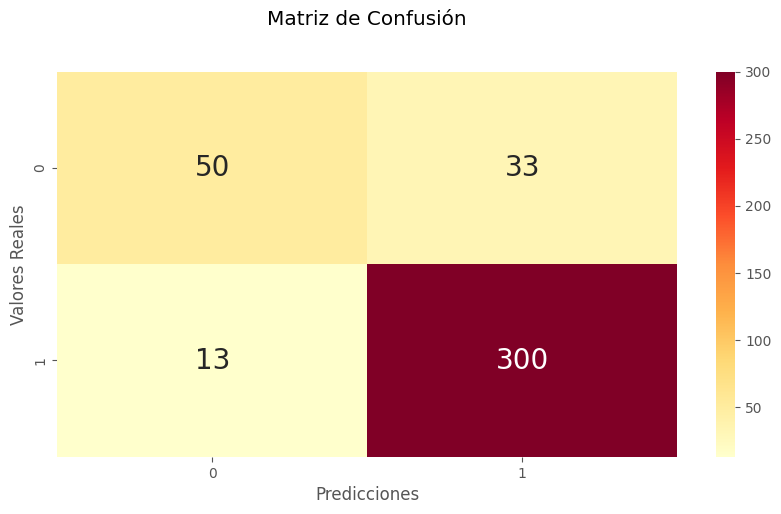

In [ ]:
from sklearn import metrics
MC= metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68        83
           1       0.90      0.96      0.93       313

    accuracy                           0.88       396
   macro avg       0.85      0.78      0.81       396
weighted avg       0.88      0.88      0.88       396



El modelo tiene un buen accuracy y un buen recall, los cuales superan el 0.88, podemos variar el K para buscar un mejor desempeño.

#Evaluamos los valores de K para buscar el mejor modelo.

In [ ]:
# rango de K
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
px.scatter(x= k_range,
           y= scores,
           labels = k_range)


El mejor accuracy variando el K es de 0.8964 con k de nueve.

In [ ]:
from sklearn.model_selection import GridSearchCV

# definimos los parámetros que vamos a combinar. Diccionario
grid_params = {"n_neighbors" : list(range(1, 20)),         # se recorre la lista en k
               "weights" : ["uniform","distance"],         # se establecen los pesos
               "metric" : ["euclidean","manhattan"]}       # se establecen las métricas

# hacemos la búsqueda en grilla con 5-folds
Grid_Search = GridSearchCV(KNN,                            # el modelo aplicado
                  grid_params,                             # los parámetros que van a variar
                  cv = 10,                                 # el número de folds
                  verbose = 0)                             # para que imprima resultados. Posibilidades: 1,2 o 3
# Entrenar el modelo obtenido arriba
g_res = Grid_Search.fit(X_train,y_train)

print("Mejor score: ",g_res.best_score_)
print("Mejores hiperparámetros", g_res.best_params_)

Mejor score:  0.9143992519869097
Mejores hiperparámetros {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'uniform'}


# <FONT COLOR="green"> **. Conclusiones** </FONT>

Reporte algunas conclusiones sobre el desarrollo del trabajo.

Es importante realizar un analisis exploratorio para determinar que variables deben ser ajustadas para nuestros modelos.

El EDA es una gran herramienta que nos permite encontrar informacion importante que puede aportar al desarrollo de nuestros modelos.

# <FONT COLOR="green"> **. Bibliografía** </FONT>

Reporte 4 referencias de consulta para realizar el trabajo

-O. Theobald, “Machine Learning for Absolute Beginners,” Editorial independiente, 2018.

-A. Burkov, “The Hundred-Page Machine Learning Book,” Editorial independiente, 2018.

-A. C. Müller y S. Guido, “Introduction to Machine Learning with Python: A Guide for Data Scientists,” O’Reilly Media, 2016.

-J. D. Kelleher, B. Mac Namee y A. D’Arcy, “Fundamentals of Machine Learning for Predictive Data Analytics: Algorithms, Worked Examples, and Case Studies,” MIT Press, 2015